In [1]:
from rtt_tools import dump_data
from rtt_tools.dump_data import *  # pussy died because of this wildcard import
from rtt_tools.export import *
from rtt_tools.gen.max_rounds import FUNC_DB, FuncDb, FuncInfo

import json, itertools, os
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

logger = logging.getLogger(__name__)
coloredlogs.CHROOT_FILES = []
coloredlogs.install(level=logging.INFO, use_chroot=False)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))




/tmp/ipykernel_1065629/3663793506.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


{'time': 1648054344286, 'running': 78, 'pending': 0} 78
Time estimate to finish: 7364.81 s = 122.75 m = 2.05 h, time diff: 12085.834 = 201.43 m = 3.36 h, job delta: 128, rec: {'time': 1648042258452, 'running': 166, 'pending': 40}


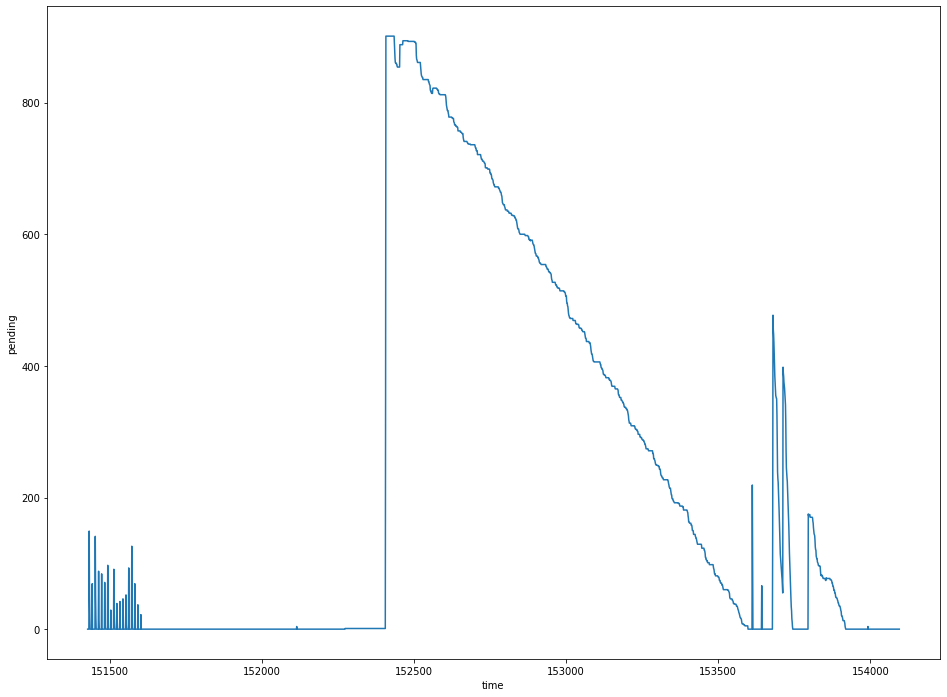

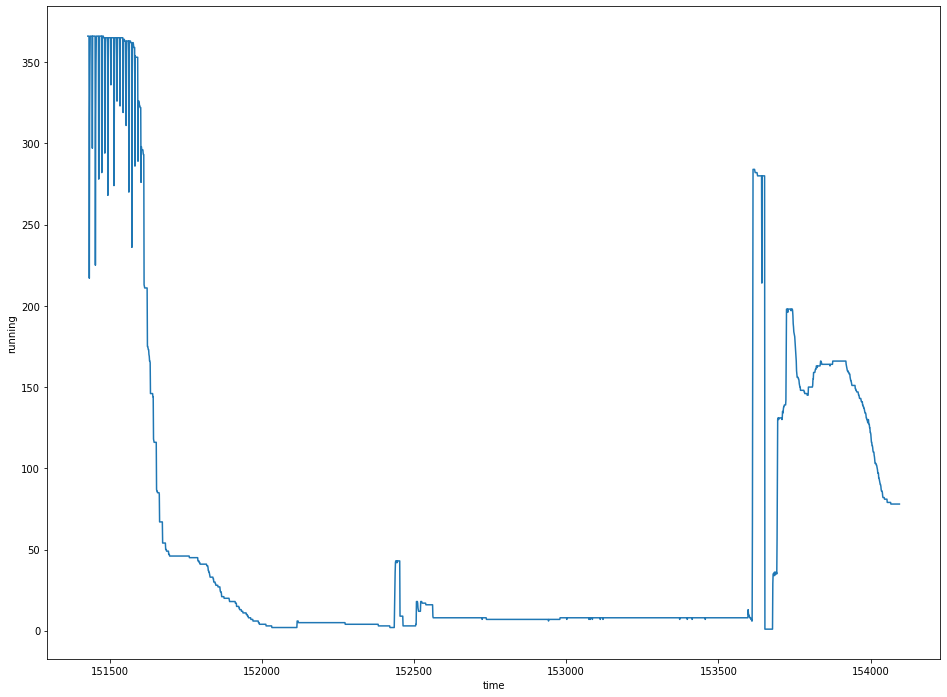

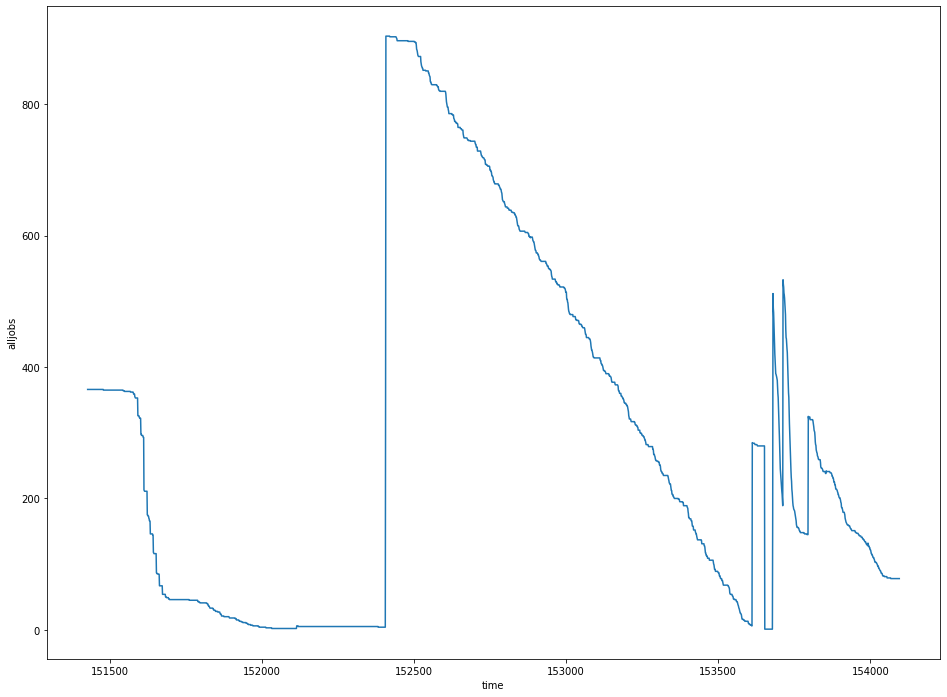

In [29]:
js = []
with open('../queue_mon.json') as fh:
    for line in fh.readlines():
        js.append(json.loads(line))

t0 = js[0]['time']/1000
js = js[-2650:]

ctotal = js[-1]['running'] + js[-1]['pending']
time_est = clast = None
for rec in itertools.islice(reversed(js[:-1]), 200):
    cctotal = rec['running'] + rec['pending']
    if cctotal < ctotal:
        break
    clast = rec
    
print(js[-1], js[-1]['running'] + js[-1]['pending'])
if clast:
    start_total = clast['running'] + clast['pending']
    time_delta = (js[-1]['time'] - clast['time']) / 1000
    jobs_delta = start_total - ctotal
    time_est = ctotal / (jobs_delta / time_delta) if time_delta != 0 and jobs_delta != 0 else 0
    print(f'Time estimate to finish: {"%.2f" % time_est} s = {"%.2f" % (time_est/60)} m = {"%.2f" % (time_est/3600)} h, time diff: {time_delta} = {"%.2f" % (time_delta/60)} m = {"%.2f" % (time_delta/3600)} h, job delta: {jobs_delta}, rec: {clast}')


times = [int((x['time']/1000 - t0)/60) for x in js]
runnings = [x['running'] for x in js]
pendings = [x['pending'] for x in js]
alljobs = [x['pending'] + x['running'] for x in js]

plt.figure(figsize=(16, 12))
data_plot = pd.DataFrame({"time": times, "running": runnings, "pending": pendings, "alljobs": alljobs})
sns.lineplot(x = "time", y = "pending", data=data_plot)
plt.show()

plt.figure(figsize=(16, 12))
sns.lineplot(x = "time", y = "running", data=data_plot)
plt.show()

plt.figure(figsize=(16, 12))
sns.lineplot(x = "time", y = "alljobs", data=data_plot)
plt.show()
js = []

In [80]:
def weighted_randomize_first_n(lst, priority, n=1000, scaled=False):
    """Randomizing first N elements from lst, taking priority into account"""
    n = n if n < len(lst) else len(lst)
    la, lb = lst[:n], lst[n:]
    indices = list(range(n))
    random.shuffle(indices)

    min_p, max_p = min(priority), max(priority)
    range_p = (max_p - min_p) + 1
    divisor = range_p if scaled else max_p
    norm_p = [(x - min_p) / divisor for x in priority]  # max_p or range_p divisor
    picker = [(lst[i], int(indices[i] + norm_p[i] * n)) for i in range(n)]
    picker.sort(key=lambda x: -x[1])
    return [x[0] for x in picker] + lb

In [ ]:
lst=[str(x) for x in range(1000)]
priority=[5000] + [1000]*999

In [ ]:
positions=[]
for x in range(1000):
    r = weighted_randomize_first_n(lst, priority, scaled=False)
    p = r.index('0')
    positions.append(p)
#print(positions)

In [ ]:
data_plot = pd.DataFrame({"x": positions})

plt.figure(figsize=(16, 12))
sns.histplot(x = "x", data=data_plot, binwidth=20)
plt.show()

In [4]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.10.2 (main, Jan 20 2022, 12:30:11) [GCC 4.8.5 20150623 (Red Hat 4.8.5-44)]
Version info.
sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [1]:
aa=[1,2,3]

In [2]:
[aa.append(None) for _ in range(3)]

[None, None, None]

In [3]:
aa

[1, 2, 3, None, None, None]

In [6]:
all([1,1,1])

True

In [7]:
pv=0.0001
min(pv, 1-pv)

0.0001

In [15]:
import statsmodels.stats.multitest as smm
#aa= [0.9121828654785112, 0.833330367706585, 0.7093639039276031, 0.9959007025176326, 9.99999999999999e-06, 0.635059882346217, 0.8783878200536325, 0.9798642402105848, 0.5222091596748696, 0.15071023186714566, 0.4693315769509818, 0.07120851273036127, 0.01226056809312033, 9.99999999999999e-06, 0.2740538974955782, 0.1408866600020051, 0.15990129135702902, 0.022208832525639224, 0.620462164574861, 0.5810493639005612, 0.22082143925911576, 0.9431710606681458, 0.10132789920931946, 0.8399921566292053, 0.7573313680270666, 0.8582832940218369, 0.17447994920151297, 0.5084652750238541, 0.15133432047685766, 0.34007336095693813, 0.10923647188790106, 9.99999999999999e-06, 0.8668662641181974, 0.3915499565416737, 0.38122795346486554, 0.30263628949357846]
aa= [9.99999999999999e-06, 0.2740538974955782, 0.1408866600020051, 9.99999999999999e-06]
rr=smm.multipletests(aa, alpha=1e-6, method='hommel') #method='holm')
print(rr)
print(sum(rr[0]))

(array([False, False, False, False]), array([3.00000000e-05, 2.74053897e-01, 2.74053897e-01, 3.00000000e-05]), 2.5000009373776777e-07, 2.5e-07)
0


In [17]:
9.99999999999999e-06 < 1e-5

True

In [4]:
(1-0.999999999999999) < 1e-20

False

In [5]:
def pval_corr(pval):
    """Pvalues close to 1 are often considered as rejecting as well, e.g., AndersonDarling 0.999999999999999"""
    return (1 - pval) if pval is not None and pval != 1 and (1 - pval) < 1e-14 else pval


print(pval_corr(0.999999999999999))

9.992007221626409e-16


In [7]:
1-0.9999999999994239

5.760947274779937e-13

In [11]:
a=[1,2,3,4,5]
a[:-1]

[1, 2, 3, 4]